In [19]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import time
from sklearn import datasets, decomposition, manifold, preprocessing
from colorsys import hsv_to_rgb
import umap
import math

In [20]:
# Ignore UserWarnings
import warnings
warnings.simplefilter('ignore', UserWarning)

In [21]:
def get_param_dim_n_neighbors(n_param_dim: int, n_sample: int) -> np.array:
    assert(n_sample > 20)
    assert(n_param_dim < 20)

    # max& min  n_neighbors as a % of n_sample
    max_pct = 0.25
    min_pct = 0.005
    max = math.ceil(n_sample * max_pct)
    min = math.ceil(n_sample * min_pct)
    diff = max - min
    avg_len = math.floor( diff / (npd - 1) )
    rem = diff % (npd - 1)

    rev_res = [max]
    p = max - avg_len
    while (p > min):
        if rem > 0:
            p -= 1
            rem -= 1
        rev_res.append(p)
        p -= avg_len
    rev_res.append(min)
    res = []
    while rev_res:
        res.append(rev_res.pop())
    return np.array(res)

def get_param_dim_min_dist(n_param_dim: int) -> np.array:
    res = np.linspace(0, 0.99, n_param_dim)
    res = np.array([round(p, 2) for p in res])
    return res

    
print(get_param_dim_n_neighbors(5, 500))
print(get_param_dim_min_dist(5))

[  3  33  63  94 125]
[0.   0.25 0.5  0.74 0.99]


In [22]:
blobs, blob_labels = datasets.make_blobs(
    n_samples=500, n_features=10, centers=5, random_state=42
)

# blobs = arrary of arrays
# blob_labels = array of ints
len(blobs)
len(blob_labels)
len(blobs[0])

10

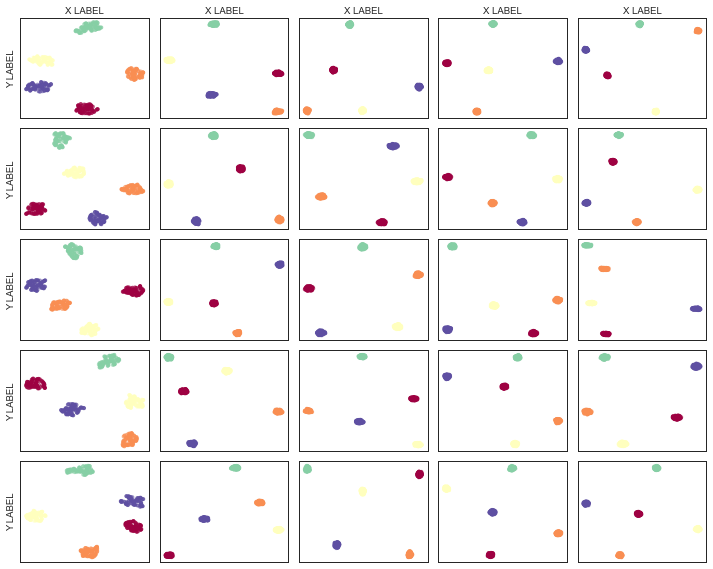

In [26]:
sns.set(context="paper", style="white")

n_rows = 5
n_cols = 5 
n_neighbors_dim = get_param_dim_n_neighbors(n_rows, len(blobs))
min_dist_dim = get_param_dim_min_dist(n_cols)

min_dist_dim = np.array([0.1, 0.1, 0.1, 0.1, 0.1])


ax_index = 1
ax_list = []
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)

for p1 in min_dist_dim:
    for p2 in n_neighbors_dim:
        embedding = umap.UMAP(n_components=2, n_neighbors=p2, min_dist=p1).fit_transform(blobs)
        ax = plt.subplot(n_rows, n_cols, ax_index)
        ax.scatter(*embedding.T, s=10, c=blob_labels, cmap="Spectral", alpha=0.5)
        ax_list.append(ax)
        ax_index += 1
 
plt.setp(ax_list, xticks=[], yticks=[])


for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel("Y LABEL")
for i in range(n_cols):
    ax_list[i].set_xlabel("X LABEL")
    ax_list[i].xaxis.set_label_position("top")


plt.tight_layout()
plt.show()

In [ ]:

sns.set(context="paper", style="white")

blobs, blob_labels = datasets.make_blobs(
    n_samples=500, n_features=10, centers=5, random_state=42
)
iris = datasets.load_iris()
digits = datasets.load_digits(n_class=10)
wine = datasets.load_wine()
swissroll, swissroll_labels = datasets.make_swiss_roll(
    n_samples=1000, noise=0.1, random_state=42
)
sphere = np.random.normal(size=(600, 3))
sphere = preprocessing.normalize(sphere)
sphere_hsv = np.array(
    [
        (
            (np.arctan2(c[1], c[0]) + np.pi) / (2 * np.pi),
            np.abs(c[2]),
            min((c[2] + 1.1), 1.0),
        )
        for c in sphere
    ]
)
sphere_colors = np.array([hsv_to_rgb(*c) for c in sphere_hsv])

reducers = [
    (manifold.TSNE, {"perplexity": 50}),
    # (manifold.LocallyLinearEmbedding, {'n_neighbors':10, 'method':'hessian'}),
    (manifold.Isomap, {"n_neighbors": 30}),
    (manifold.MDS, {}),
    (decomposition.PCA, {}),
    (umap.UMAP, {"n_neighbors": 30, "min_dist": 0.3}),
]

test_data = [
    (blobs, blob_labels),
    (iris.data, iris.target),
    (digits.data, digits.target),
    (wine.data, wine.target),
    (swissroll, swissroll_labels),
    (sphere, sphere_colors),
]
dataset_names = ["Blobs", "Iris", "Digits", "Wine", "Swiss Roll", "Sphere"]

n_rows = len(test_data)
n_cols = len(reducers)
ax_index = 1
ax_list = []

# plt.figure(figsize=(9 * 2 + 3, 12.5))
plt.figure(figsize=(10, 8))
plt.subplots_adjust(
    left=0.02, right=0.98, bottom=0.001, top=0.96, wspace=0.05, hspace=0.01
)
for data, labels in test_data:
    for reducer, args in reducers:
        start_time = time.time()
        embedding = reducer(n_components=2, **args).fit_transform(data)
        elapsed_time = time.time() - start_time
        ax = plt.subplot(n_rows, n_cols, ax_index)
        if isinstance(labels[0], tuple):
            ax.scatter(*embedding.T, s=10, c=labels, alpha=0.5)
        else:
            ax.scatter(*embedding.T, s=10, c=labels, cmap="Spectral", alpha=0.5)
        ax.text(
            0.99,
            0.01,
            "{:.2f} s".format(elapsed_time),
            transform=ax.transAxes,
            size=14,
            horizontalalignment="right",
        )
        ax_list.append(ax)
        ax_index += 1

plt.setp(ax_list, xticks=[], yticks=[])

for i in np.arange(n_rows) * n_cols:
    ax_list[i].set_ylabel(dataset_names[i // n_cols], size=16)
for i in range(n_cols):
    ax_list[i].set_xlabel(repr(reducers[i][0]()).split("(")[0], size=16)
    ax_list[i].xaxis.set_label_position("top")

plt.tight_layout()
plt.show()